In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("Training.csv")

# Data Exploration and Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [4]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [5]:
df["Cholesterol Level"].value_counts()

Cholesterol Level
High      166
Normal    149
Low        34
Name: count, dtype: int64

In [6]:
## checking for missing values
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [7]:
df.duplicated().sum() ## found duplicated rows

49

In [8]:
df = df.drop_duplicates(df)

In [9]:
df.duplicated().sum() ## dupliacted rows removed

0

# Exploratory Data Analysis

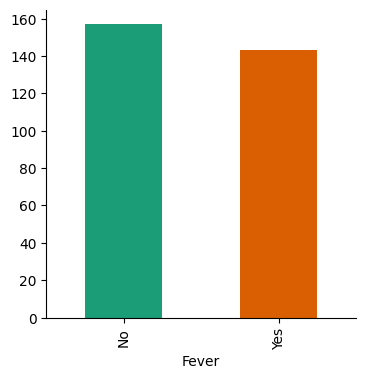

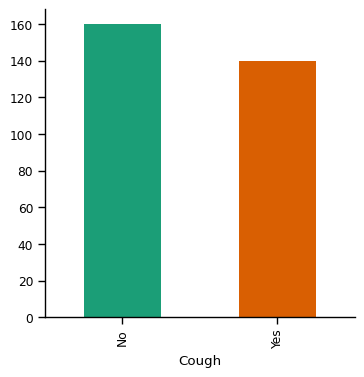

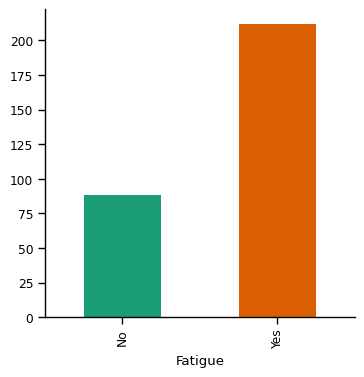

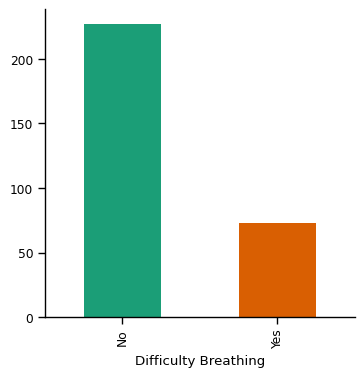

In [10]:
# @title Fever
plt.subplots(figsize=(4, 4))
df.groupby('Fever').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
sns.set_context("paper")
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

# @title Cough
plt.subplots(figsize=(4, 4))
df.groupby('Cough').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.show()

# @title Fatigue
plt.subplots(figsize=(4, 4))
df.groupby('Fatigue').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.show()

# @title Difficulty Breathing
plt.subplots(figsize=(4, 4))
df.groupby('Difficulty Breathing').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.show()

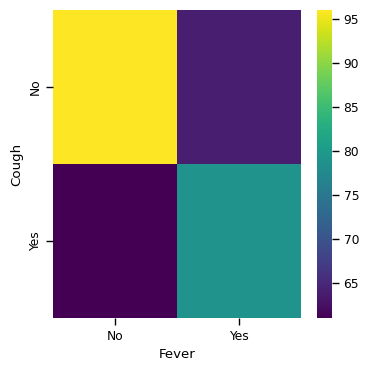

In [11]:
# @title Fever vs Cough

plt.subplots(figsize=(4, 4))
df_2dhist = pd.DataFrame({
    x_label: grp['Cough'].value_counts()
    for x_label, grp in df.groupby('Fever')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Fever')
_ = plt.ylabel('Cough')

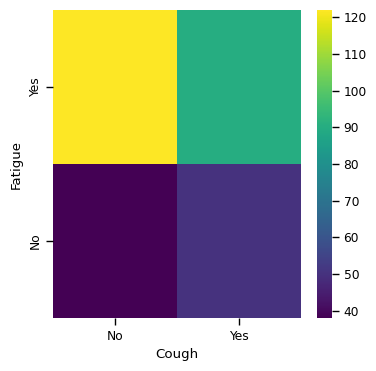

In [12]:
# @title Cough vs Fatigue

plt.subplots(figsize=(4, 4))
df_2dhist = pd.DataFrame({
    x_label: grp['Fatigue'].value_counts()
    for x_label, grp in df.groupby('Cough')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Cough')
_ = plt.ylabel('Fatigue')

# MODEL TRAINING

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [14]:
X = df.drop(columns=["Outcome Variable","Age"]).values

In [15]:
X_copy = df.drop(columns=["Outcome Variable"]).values

In [16]:
X.shape

(300, 8)

In [17]:
y = df["Outcome Variable"].values

In [18]:
ohe = OneHotEncoder()
le = LabelEncoder()
scaler = MinMaxScaler()
X = ohe.fit_transform(X)
y = le.fit_transform(y)

In [19]:
X = X.A

In [20]:
age_array = df["Age"].values
age_array = scaler.fit_transform(age_array.reshape(-1,1))

In [21]:
minimum = scaler.data_min_
maximum = scaler.data_max_
print(minimum, " " , maximum)

[19.]   [90.]


In [22]:
age_array = age_array.reshape(-1,1)

In [23]:
new_array = np.concatenate((X, age_array), axis=1)

In [24]:
# new_array

In [25]:
X_train, X_test, y_train, y_test = train_test_split(new_array,y, test_size=0.2, random_state=42)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Grid search cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model on the test set
best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.7333333333333333


In [28]:
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=None, min_samples_leaf=2, min_samples_split=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Precision : ",precision_score(y_test, y_pred))
print("Recall : ",recall_score(y_test, y_pred))
print("F1_Score : ",f1_score(y_test, y_pred))

Precision :  0.6857142857142857
Recall :  0.7272727272727273
F1_Score :  0.7058823529411765


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=10, stop=200, num=10)],  # Number of trees in the forest
    'max_depth': [None] + [int(x) for x in np.linspace(10, 110, num=11)],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Randomized search cross-validation
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Evaluate the model on the test set
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 31, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 110}
Accuracy: 0.7333333333333333


In [31]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Precision : ",precision_score(y_test, y_pred))
print("Recall : ",recall_score(y_test, y_pred))
print("F1_Score : ",f1_score(y_test, y_pred))

Precision :  0.675
Recall :  0.8181818181818182
F1_Score :  0.7397260273972602


In [32]:
from sklearn.svm import SVC

In [33]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']  # Auto or scale can be used
}

# Create an SVM classifier
svm_classifier = SVC()

# Grid search cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model on the test set
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 0.65


In [34]:
svm = SVC(C=10, gamma="auto", kernel="rbf")
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Precision : ",precision_score(y_test, y_pred))
print("Recall : ",recall_score(y_test, y_pred))
print("F1_Score : ",f1_score(y_test, y_pred))

Precision :  0.7567567567567568
Recall :  0.8484848484848485
F1_Score :  0.8


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'penalty': ['l1', 'l2']  # Penalty ('l1' for Lasso, 'l2' for Ridge)
}

# Create a logistic regression classifier
log_reg_classifier = LogisticRegression(solver='liblinear')

# Grid search cross-validation
grid_search = GridSearchCV(estimator=log_reg_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model on the test set
best_log_reg_model = grid_search.best_estimator_
y_pred = best_log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.7166666666666667


In [37]:
lr = LogisticRegression(C=1, penalty="l2")
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Precision : ",precision_score(y_test, y_pred))
print("Recall : ",recall_score(y_test, y_pred))
print("F1_Score : ",f1_score(y_test, y_pred))

Precision :  0.7
Recall :  0.8484848484848485
F1_Score :  0.7671232876712328


In [38]:
## function defined to predict the disease
## as decision tree is performing best we will be using that model

def predict_disease(patient, age):
  patient = ohe.transform(patient)
  age_array = np.array([age], ndmin=2)
  age_array = scaler.transform(age_array)
  # print(age_array)
  patient = np.concatenate((patient.A, age_array), axis=1)
  probabilities = rf.predict_proba(patient)
  return probabilities

In [39]:
probabilities = predict_disease([["Eczema"	, "No", 	"Yes", 	"Yes", 	"No","Female"	,"Normal","Normal"]], 60)
class_names = {0: 'Negative', 1: 'Positive'}

# Display the exact probabilities for each class
for i, prob in enumerate(probabilities[0]):
    class_name = class_names[i]
    print(f"Probability of {class_name}: {prob:.4f}")

Probability of Negative: 0.6300
Probability of Positive: 0.3700


# Model Interpretibility

# Model Deployment

In [40]:
## creating pickle file for model deployment
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(rf, pickle_out)


In [41]:
pickle.dump(df,open("dataset.pkl", "wb"))
pickle.dump(ohe, open("ohencoder.pkl","wb"))
pickle_out.close()